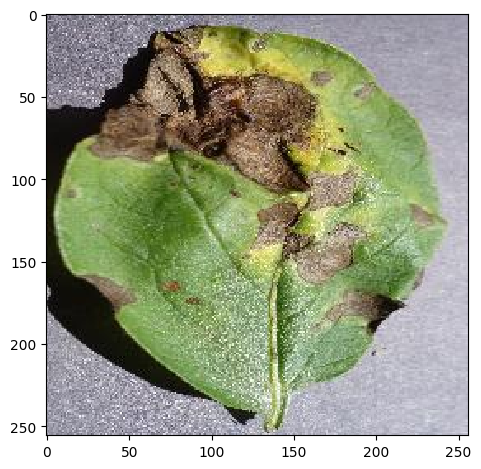

In [1]:
# import required libraries
from skimage import io
import numpy as np
image = io.imread(r'C:\Users\Arfan Shah\Potato_Disease_DetectionandClassifictaion\data\binary\Train\B(Unhealthy)\1.jpg')
io.imshow(image)

In [2]:
image

array([[[151, 147, 162],
        [104, 100, 115],
        [117, 113, 128],
        ...,
        [160, 157, 174],
        [154, 151, 168],
        [148, 145, 162]],

       [[138, 134, 149],
        [132, 128, 143],
        [112, 108, 123],
        ...,
        [164, 161, 178],
        [159, 156, 173],
        [154, 151, 168]],

       [[105, 101, 116],
        [154, 150, 165],
        [ 82,  78,  93],
        ...,
        [166, 163, 180],
        [164, 161, 178],
        [161, 158, 175]],

       ...,

       [[159, 158, 172],
        [135, 134, 148],
        [151, 150, 164],
        ...,
        [200, 199, 213],
        [196, 195, 209],
        [193, 192, 206]],

       [[168, 167, 181],
        [152, 151, 165],
        [145, 144, 158],
        ...,
        [219, 218, 232],
        [221, 220, 234],
        [221, 220, 234]],

       [[136, 135, 149],
        [180, 179, 193],
        [152, 151, 165],
        ...,
        [192, 191, 205],
        [193, 192, 206],
        [192, 191, 205]]

In [3]:
height, width, channels = image.shape

print(height, width, channels)

256 256 3


In [4]:
image.shape

(256, 256, 3)

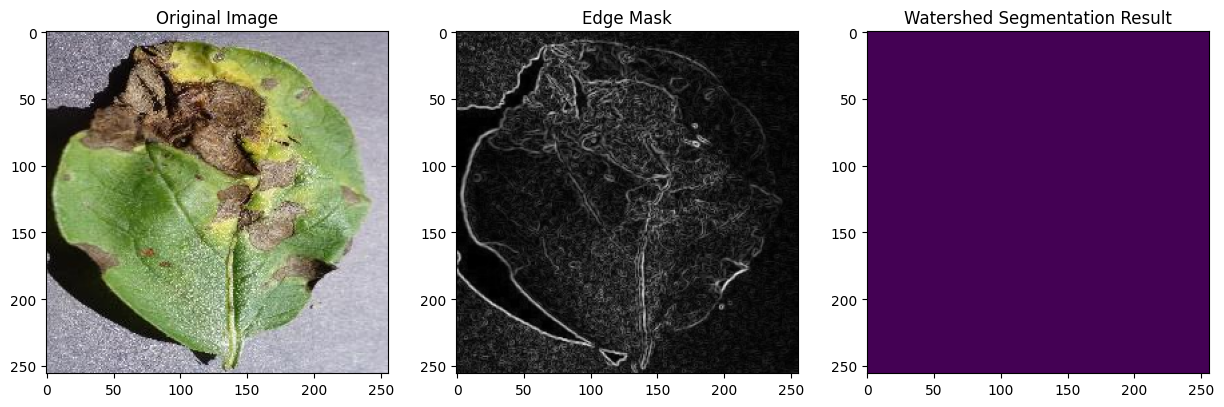

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_erosion
from skimage import util

# Convert the image to floating point representation
image_float = util.img_as_float(image)

# Convert the image to grayscale
image_gray = rgb2gray(image_float)

# Create an edge mask using Sobel filter
edges = filters.sobel(image_gray)

# Generate markers for watershed segmentation
markers = np.zeros_like(image_gray)
markers[image_gray < 0.7] = 1
markers[image_gray > 0.9] = 2

# Erode markers to separate regions
markers = binary_erosion(markers, disk(2))

# Apply watershed segmentation
segmentation = watershed(edges, markers)

# Label the regions and get region properties
labeled_regions = label(segmentation)
region_props = regionprops(labeled_regions)

# Visualize the original image, edge mask, and the segmented result
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Edge Mask')

ax3.imshow(segmentation, cmap='viridis')
ax3.set_title('Watershed Segmentation Result')

plt.show()


In [12]:
# extract features and then store in an excel file
import xlsxwriter as xlsx

# add workbook
workbook = xlsx.Workbook('potato_features.xlsx')

# add worksheet
worksheet = workbook.add_worksheet()

# write the features in columns
worksheet.write('A1', 'Mean')
worksheet.write('B1', 'Median')
worksheet.write('C1', 'Variance')
worksheet.write('D1', 'Std')
workbook.close()

In [13]:
# now read images from the directory
import glob

# make an empty list then add images arrays to it
images_list = []

# read each image and then add it to the empty list declared above
for file in glob.glob(''):